# rnnlm_gen.py

In [12]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
#from common.functions import softmax
#from ch06.rnnlm import Rnnlm
#from ch06.better_rnnlm import BetterRnnlm

In [13]:
class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        return self.lstm_layer.h, self.lstm_layer.c

    def set_state(self, state):
        self.lstm_layer.set_state(*state)

# generate_text.py

In [14]:
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

# generate_better_text.py

### model: RnnlmGen()

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
#from rnnlm_gen import RnnlmGen
from dataset import ptb

In [19]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

In [20]:
model = RnnlmGen()
path_pkl = "Rnnlm.pkl" #../ch06/Rnnlm.pkl'
model.load_params(path_pkl)

In [22]:
# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
start_id

316

In [23]:
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
skip_ids

[27, 26, 416]

In [24]:
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you can keep stock.
 mr. bergsma said its two warming projects each is n't good.
 in printing on the international based on its grip on the company but said it is n't think it is a perfect signal of the acquisition.
 the adults may mixed and economic policies the disasters could steal the payment of its limited absence to the products ' collapse next.
 to things at least chicago-based environmental purposes rolled out.
 if the existing population is hit.
 it was little even enough support after bracing for some rates.
 the company also


### model: BetterRnnlmGen()

In [27]:
# coding: utf-8
import sys
sys.path.append('..')
#from common.np import *
#from rnnlm_gen import BetterRnnlmGen
from dataset import ptb

In [51]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

In [52]:
vocab_size = len(word_to_id)
vocab_size

10000

In [53]:
corpus_size = len(corpus)
corpus_size

929589

In [54]:
model = BetterRnnlmGen()
path_better_pkl = 'BetterRnnlm.pkl' #'../ch06/BetterRnnlm.pkl'
model.load_params(path_better_pkl)

In [55]:
# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
start_id

316

In [56]:
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
skip_ids

[27, 26, 416]

In [57]:
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you fail fit board.
 lloyd 's rural london-based business he took a ohbayashi donald carl saul furukawa who seems to have callable to wholesale.
 david saw only casino crest of morris formerly corp. swung.
 in half the epicenter is n't found alternative in the strategy a top road increase bottle from an decline threat with controllers and jointly nbi back a supreme idea.
 corporation has can mounting more stake in the years.
 old machine decker managed a lot in ok there will take pitching a death.
 having similar control succeeding blank and a bushel


In [58]:
model.reset_state()

In [59]:
start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]
start_ids

[32, 4748, 42, 2262, 40]

In [60]:
start_ids[:-1]

[32, 4748, 42, 2262]

In [72]:
for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    print("x:",x)
    result = model.predict(x)
    result = list(result[0][0])
    print("result max:",max(result))
    print("result max idx:",result.index(max(result)))

x: [[32]]
result max: 7.908224
result max idx: 26
x: [[4748]]
result max: 8.288848
result max idx: 40
x: [[42]]
result max: 8.633339
result max idx: 32
x: [[2262]]
result max: 8.372519
result max idx: 24


In [73]:
start_ids[-1]

40

In [74]:
word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
#print('-' * 50)
print(txt)

the meaning of life is the liquidate money too without force.
 we 've trying to the country to underwriters characters could be trying to outperform the travel the jaguar.
 your long project call their box mirage for all logical in pachinko things he either and very wonder the warning is a problem you built that to make back gives that even simply making building less disappointing rates on deficit.
 friday when an controlling points especially on the biggest redevelopment has made bitterly preference away after technology with all reduced phelps who is in a region until the meetings also been emerged


# seq2seq.py

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
#from common.time_layers import *
#from common.base_model import BaseModel

In [ ]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [15]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled

In [16]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled


# peeky_seq2seq.py

In [17]:
# coding: utf-8
import sys
sys.path.append('..')
#from common.time_layers import *
#from seq2seq import Seq2seq, Encoder

In [18]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled

In [ ]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

# train_seq2seq.py

In [75]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
#from common.optimizer import Adam
#from common.trainer import Trainer
#from common.util import eval_seq2seq
#from seq2seq import Seq2seq
#from peeky_seq2seq import PeekySeq2seq

In [76]:
# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

In [77]:
# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

In [78]:
# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [79]:
# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================

In [80]:
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [81]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 20[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---


| 에폭 8 |  반복 41 / 351 | 시간 1[s] | 손실 1.05
| 에폭 8 |  반복 61 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 81 / 351 | 시간 3[s] | 손실 1.04
| 에폭 8 |  반복 101 / 351 | 시간 4[s] | 손실 1.05
| 에폭 8 |  반복 121 / 351 | 시간 4[s] | 손실 1.08
| 에폭 8 |  반복 141 / 351 | 시간 5[s] | 손실 1.07
| 에폭 8 |  반복 161 / 351 | 시간 6[s] | 손실 1.06
| 에폭 8 |  반복 181 / 351 | 시간 7[s] | 손실 1.04
| 에폭 8 |  반복 201 / 351 | 시간 8[s] | 손실 1.03
| 에폭 8 |  반복 221 / 351 | 시간 9[s] | 손실 1.02
| 에폭 8 |  반복 241 / 351 | 시간 10[s] | 손실 1.01
| 에폭 8 |  반복 261 / 351 | 시간 10[s] | 손실 1.02
| 에폭 8 |  반복 281 / 351 | 시간 11[s] | 손실 1.01
| 에폭 8 |  반복 301 / 351 | 시간 12[s] | 손실 1.01
| 에폭 8 |  반복 321 / 351 | 시간 13[s] | 손실 1.01
| 에폭 8 |  반복 341 / 351 | 시간 14[s] | 손실 1.01
Q 77+85  
T 162 
☒ 158 
---
Q 975+164
T 1139
☒ 1108
---
Q 582+84 
T 666 
☒ 661 
---
Q 8+155  
T 163 
☒ 156 
---
Q 367+55 
T 422 
☒ 411 
---
Q 600+257
T 857 
☒ 838 
---
Q 761+292
T 1053
☒ 1009
---
Q 830+597
T 1427
☒ 1411
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 227 
---
검증 정확도 3.940%
| 에폭 9 |  반복 1 

| 에폭 15 |  반복 61 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 81 / 351 | 시간 3[s] | 손실 0.87
| 에폭 15 |  반복 101 / 351 | 시간 4[s] | 손실 0.87
| 에폭 15 |  반복 121 / 351 | 시간 4[s] | 손실 0.87
| 에폭 15 |  반복 141 / 351 | 시간 5[s] | 손실 0.91
| 에폭 15 |  반복 161 / 351 | 시간 6[s] | 손실 0.87
| 에폭 15 |  반복 181 / 351 | 시간 6[s] | 손실 0.88
| 에폭 15 |  반복 201 / 351 | 시간 7[s] | 손실 0.90
| 에폭 15 |  반복 221 / 351 | 시간 8[s] | 손실 0.90
| 에폭 15 |  반복 241 / 351 | 시간 9[s] | 손실 0.88
| 에폭 15 |  반복 261 / 351 | 시간 10[s] | 손실 0.89
| 에폭 15 |  반복 281 / 351 | 시간 11[s] | 손실 0.89
| 에폭 15 |  반복 301 / 351 | 시간 12[s] | 손실 0.88
| 에폭 15 |  반복 321 / 351 | 시간 13[s] | 손실 0.89
| 에폭 15 |  반복 341 / 351 | 시간 13[s] | 손실 0.89
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☒ 1128
---
Q 582+84 
T 666 
☒ 662 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1414
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 238 
---
검증 정확도 5.860%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.87
|

| 에폭 22 |  반복 61 / 351 | 시간 2[s] | 손실 0.81
| 에폭 22 |  반복 81 / 351 | 시간 3[s] | 손실 0.81
| 에폭 22 |  반복 101 / 351 | 시간 4[s] | 손실 0.80
| 에폭 22 |  반복 121 / 351 | 시간 5[s] | 손실 0.82
| 에폭 22 |  반복 141 / 351 | 시간 5[s] | 손실 0.80
| 에폭 22 |  반복 161 / 351 | 시간 6[s] | 손실 0.79
| 에폭 22 |  반복 181 / 351 | 시간 7[s] | 손실 0.82
| 에폭 22 |  반복 201 / 351 | 시간 8[s] | 손실 0.79
| 에폭 22 |  반복 221 / 351 | 시간 9[s] | 손실 0.82
| 에폭 22 |  반복 241 / 351 | 시간 9[s] | 손실 0.79
| 에폭 22 |  반복 261 / 351 | 시간 10[s] | 손실 0.78
| 에폭 22 |  반복 281 / 351 | 시간 11[s] | 손실 0.78
| 에폭 22 |  반복 301 / 351 | 시간 11[s] | 손실 0.79
| 에폭 22 |  반복 321 / 351 | 시간 12[s] | 손실 0.79
| 에폭 22 |  반복 341 / 351 | 시간 13[s] | 손실 0.81
Q 77+85  
T 162 
☒ 159 
---
Q 975+164
T 1139
☒ 1127
---
Q 582+84 
T 666 
☒ 655 
---
Q 8+155  
T 163 
☒ 157 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1430
---
Q 26+838 
T 864 
☒ 875 
---
Q 143+93 
T 236 
☒ 232 
---
검증 정확도 5.420%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.84
|

In [83]:
"""
| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 20[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---
Q 26+838 
T 864 
☒ 1000
---
Q 143+93 
T 236 
☒ 100 
---
검증 정확도 0.180%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.74
| 에폭 2 |  반복 21 / 351 | 시간 0[s] | 손실 1.73
| 에폭 2 |  반복 41 / 351 | 시간 1[s] | 손실 1.74
| 에폭 2 |  반복 61 / 351 | 시간 2[s] | 손실 1.74
| 에폭 2 |  반복 81 / 351 | 시간 4[s] | 손실 1.73
| 에폭 2 |  반복 101 / 351 | 시간 5[s] | 손실 1.73
| 에폭 2 |  반복 121 / 351 | 시간 7[s] | 손실 1.72
| 에폭 2 |  반복 141 / 351 | 시간 8[s] | 손실 1.71
| 에폭 2 |  반복 161 / 351 | 시간 9[s] | 손실 1.71
| 에폭 2 |  반복 181 / 351 | 시간 10[s] | 손실 1.71
| 에폭 2 |  반복 201 / 351 | 시간 11[s] | 손실 1.70
| 에폭 2 |  반복 221 / 351 | 시간 12[s] | 손실 1.71
| 에폭 2 |  반복 241 / 351 | 시간 13[s] | 손실 1.70
| 에폭 2 |  반복 261 / 351 | 시간 14[s] | 손실 1.69
| 에폭 2 |  반복 281 / 351 | 시간 15[s] | 손실 1.69
| 에폭 2 |  반복 301 / 351 | 시간 17[s] | 손실 1.69
| 에폭 2 |  반복 321 / 351 | 시간 17[s] | 손실 1.68
| 에폭 2 |  반복 341 / 351 | 시간 18[s] | 손실 1.67
Q 77+85  
T 162 
☒ 994 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 700 
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 400 
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1544
---
Q 26+838 
T 864 
☒ 400 
---
Q 143+93 
T 236 
☒ 400 
---
검증 정확도 0.220%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.66
| 에폭 3 |  반복 21 / 351 | 시간 0[s] | 손실 1.66
| 에폭 3 |  반복 41 / 351 | 시간 1[s] | 손실 1.65
| 에폭 3 |  반복 61 / 351 | 시간 1[s] | 손실 1.63
| 에폭 3 |  반복 81 / 351 | 시간 2[s] | 손실 1.62
| 에폭 3 |  반복 101 / 351 | 시간 3[s] | 손실 1.62
| 에폭 3 |  반복 121 / 351 | 시간 3[s] | 손실 1.60
| 에폭 3 |  반복 141 / 351 | 시간 4[s] | 손실 1.59
| 에폭 3 |  반복 161 / 351 | 시간 5[s] | 손실 1.57
| 에폭 3 |  반복 181 / 351 | 시간 5[s] | 손실 1.57
| 에폭 3 |  반복 201 / 351 | 시간 6[s] | 손실 1.56
| 에폭 3 |  반복 221 / 351 | 시간 6[s] | 손실 1.54
| 에폭 3 |  반복 241 / 351 | 시간 7[s] | 손실 1.52
| 에폭 3 |  반복 261 / 351 | 시간 8[s] | 손실 1.52
| 에폭 3 |  반복 281 / 351 | 시간 8[s] | 손실 1.52
| 에폭 3 |  반복 301 / 351 | 시간 9[s] | 손실 1.50
| 에폭 3 |  반복 321 / 351 | 시간 10[s] | 손실 1.49
| 에폭 3 |  반복 341 / 351 | 시간 10[s] | 손실 1.48
Q 77+85  
T 162 
☒ 108 
---
Q 975+164
T 1139
☒ 1001
---
Q 582+84 
T 666 
☒ 648 
---
Q 8+155  
T 163 
☒ 138 
---
Q 367+55 
T 422 
☒ 448 
---
Q 600+257
T 857 
☒ 848 
---
Q 761+292
T 1053
☒ 1011
---
Q 830+597
T 1427
☒ 1373
---
Q 26+838 
T 864 
☒ 868 
---
Q 143+93 
T 236 
☒ 348 
---
검증 정확도 0.560%
| 에폭 4 |  반복 1 / 351 | 시간 0[s] | 손실 1.47
| 에폭 4 |  반복 21 / 351 | 시간 0[s] | 손실 1.46
| 에폭 4 |  반복 41 / 351 | 시간 1[s] | 손실 1.44
| 에폭 4 |  반복 61 / 351 | 시간 2[s] | 손실 1.43
| 에폭 4 |  반복 81 / 351 | 시간 3[s] | 손실 1.42
| 에폭 4 |  반복 101 / 351 | 시간 4[s] | 손실 1.41
| 에폭 4 |  반복 121 / 351 | 시간 5[s] | 손실 1.40
| 에폭 4 |  반복 141 / 351 | 시간 6[s] | 손실 1.40
| 에폭 4 |  반복 161 / 351 | 시간 7[s] | 손실 1.38
| 에폭 4 |  반복 181 / 351 | 시간 8[s] | 손실 1.38
| 에폭 4 |  반복 201 / 351 | 시간 9[s] | 손실 1.37
| 에폭 4 |  반복 221 / 351 | 시간 11[s] | 손실 1.35
| 에폭 4 |  반복 241 / 351 | 시간 12[s] | 손실 1.33
| 에폭 4 |  반복 261 / 351 | 시간 13[s] | 손실 1.33
| 에폭 4 |  반복 281 / 351 | 시간 14[s] | 손실 1.33
| 에폭 4 |  반복 301 / 351 | 시간 15[s] | 손실 1.32
| 에폭 4 |  반복 321 / 351 | 시간 15[s] | 손실 1.31
| 에폭 4 |  반복 341 / 351 | 시간 16[s] | 손실 1.30
Q 77+85  
T 162 
☒ 146 
---
Q 975+164
T 1139
☒ 1189
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 432 
---
Q 600+257
T 857 
☒ 866 
---
Q 761+292
T 1053
☒ 1002
---
Q 830+597
T 1427
☒ 1406
---
Q 26+838 
T 864 
☒ 862 
---
Q 143+93 
T 236 
☒ 202 
---
검증 정확도 1.060%
| 에폭 5 |  반복 1 / 351 | 시간 0[s] | 손실 1.28
| 에폭 5 |  반복 21 / 351 | 시간 0[s] | 손실 1.29
| 에폭 5 |  반복 41 / 351 | 시간 1[s] | 손실 1.28
| 에폭 5 |  반복 61 / 351 | 시간 2[s] | 손실 1.27
| 에폭 5 |  반복 81 / 351 | 시간 3[s] | 손실 1.27
| 에폭 5 |  반복 101 / 351 | 시간 3[s] | 손실 1.26
| 에폭 5 |  반복 121 / 351 | 시간 4[s] | 손실 1.26
| 에폭 5 |  반복 141 / 351 | 시간 5[s] | 손실 1.27
| 에폭 5 |  반복 161 / 351 | 시간 6[s] | 손실 1.26
| 에폭 5 |  반복 181 / 351 | 시간 7[s] | 손실 1.25
| 에폭 5 |  반복 201 / 351 | 시간 7[s] | 손실 1.23
| 에폭 5 |  반복 221 / 351 | 시간 8[s] | 손실 1.22
| 에폭 5 |  반복 241 / 351 | 시간 9[s] | 손실 1.21
| 에폭 5 |  반복 261 / 351 | 시간 10[s] | 손실 1.21
| 에폭 5 |  반복 281 / 351 | 시간 11[s] | 손실 1.21
| 에폭 5 |  반복 301 / 351 | 시간 12[s] | 손실 1.20
| 에폭 5 |  반복 321 / 351 | 시간 13[s] | 손실 1.19
| 에폭 5 |  반복 341 / 351 | 시간 14[s] | 손실 1.18
Q 77+85  
T 162 
☒ 145 
---
Q 975+164
T 1139
☒ 1168
---
Q 582+84 
T 666 
☒ 665 
---
Q 8+155  
T 163 
☒ 192 
---
Q 367+55 
T 422 
☒ 431 
---
Q 600+257
T 857 
☒ 895 
---
Q 761+292
T 1053
☒ 1015
---
Q 830+597
T 1427
☒ 1493
---
Q 26+838 
T 864 
☒ 891 
---
Q 143+93 
T 236 
☒ 221 
---
검증 정확도 2.260%
| 에폭 6 |  반복 1 / 351 | 시간 0[s] | 손실 1.17
| 에폭 6 |  반복 21 / 351 | 시간 1[s] | 손실 1.17
| 에폭 6 |  반복 41 / 351 | 시간 2[s] | 손실 1.18
| 에폭 6 |  반복 61 / 351 | 시간 3[s] | 손실 1.17
| 에폭 6 |  반복 81 / 351 | 시간 4[s] | 손실 1.16
| 에폭 6 |  반복 101 / 351 | 시간 5[s] | 손실 1.16
| 에폭 6 |  반복 121 / 351 | 시간 7[s] | 손실 1.16
| 에폭 6 |  반복 141 / 351 | 시간 8[s] | 손실 1.14
| 에폭 6 |  반복 161 / 351 | 시간 9[s] | 손실 1.14
| 에폭 6 |  반복 181 / 351 | 시간 10[s] | 손실 1.13
| 에폭 6 |  반복 201 / 351 | 시간 11[s] | 손실 1.15
| 에폭 6 |  반복 221 / 351 | 시간 12[s] | 손실 1.13
| 에폭 6 |  반복 241 / 351 | 시간 14[s] | 손실 1.13
| 에폭 6 |  반복 261 / 351 | 시간 14[s] | 손실 1.13
| 에폭 6 |  반복 281 / 351 | 시간 16[s] | 손실 1.13
| 에폭 6 |  반복 301 / 351 | 시간 17[s] | 손실 1.13
| 에폭 6 |  반복 321 / 351 | 시간 18[s] | 손실 1.10
| 에폭 6 |  반복 341 / 351 | 시간 19[s] | 손실 1.10
Q 77+85  
T 162 
☒ 166 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 660 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 411 
---
Q 600+257
T 857 
☒ 846 
---
Q 761+292
T 1053
☒ 1011
---
Q 830+597
T 1427
☒ 1412
---
Q 26+838 
T 864 
☒ 860 
---
Q 143+93 
T 236 
☒ 207 
---
검증 정확도 3.500%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 1.09
| 에폭 7 |  반복 21 / 351 | 시간 1[s] | 손실 1.10
| 에폭 7 |  반복 41 / 351 | 시간 1[s] | 손실 1.09
| 에폭 7 |  반복 61 / 351 | 시간 2[s] | 손실 1.11
| 에폭 7 |  반복 81 / 351 | 시간 3[s] | 손실 1.09
| 에폭 7 |  반복 101 / 351 | 시간 4[s] | 손실 1.09
| 에폭 7 |  반복 121 / 351 | 시간 5[s] | 손실 1.09
| 에폭 7 |  반복 141 / 351 | 시간 6[s] | 손실 1.07
| 에폭 7 |  반복 161 / 351 | 시간 7[s] | 손실 1.09
| 에폭 7 |  반복 181 / 351 | 시간 8[s] | 손실 1.08
| 에폭 7 |  반복 201 / 351 | 시간 9[s] | 손실 1.06
| 에폭 7 |  반복 221 / 351 | 시간 10[s] | 손실 1.07
| 에폭 7 |  반복 241 / 351 | 시간 10[s] | 손실 1.06
| 에폭 7 |  반복 261 / 351 | 시간 11[s] | 손실 1.12
| 에폭 7 |  반복 281 / 351 | 시간 12[s] | 손실 1.09
| 에폭 7 |  반복 301 / 351 | 시간 12[s] | 손실 1.07
| 에폭 7 |  반복 321 / 351 | 시간 13[s] | 손실 1.05
| 에폭 7 |  반복 341 / 351 | 시간 13[s] | 손실 1.05
Q 77+85  
T 162 
☒ 166 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 665 
---
Q 8+155  
T 163 
☒ 161 
---
Q 367+55 
T 422 
☒ 412 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1444
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93 
T 236 
☒ 227 
---
검증 정확도 4.400%
| 에폭 8 |  반복 1 / 351 | 시간 0[s] | 손실 1.05
| 에폭 8 |  반복 21 / 351 | 시간 0[s] | 손실 1.04
| 에폭 8 |  반복 41 / 351 | 시간 1[s] | 손실 1.05
| 에폭 8 |  반복 61 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 81 / 351 | 시간 3[s] | 손실 1.04
| 에폭 8 |  반복 101 / 351 | 시간 4[s] | 손실 1.05
| 에폭 8 |  반복 121 / 351 | 시간 4[s] | 손실 1.08
| 에폭 8 |  반복 141 / 351 | 시간 5[s] | 손실 1.07
| 에폭 8 |  반복 161 / 351 | 시간 6[s] | 손실 1.06
| 에폭 8 |  반복 181 / 351 | 시간 7[s] | 손실 1.04
| 에폭 8 |  반복 201 / 351 | 시간 8[s] | 손실 1.03
| 에폭 8 |  반복 221 / 351 | 시간 9[s] | 손실 1.02
| 에폭 8 |  반복 241 / 351 | 시간 10[s] | 손실 1.01
| 에폭 8 |  반복 261 / 351 | 시간 10[s] | 손실 1.02
| 에폭 8 |  반복 281 / 351 | 시간 11[s] | 손실 1.01
| 에폭 8 |  반복 301 / 351 | 시간 12[s] | 손실 1.01
| 에폭 8 |  반복 321 / 351 | 시간 13[s] | 손실 1.01
| 에폭 8 |  반복 341 / 351 | 시간 14[s] | 손실 1.01
Q 77+85  
T 162 
☒ 158 
---
Q 975+164
T 1139
☒ 1108
---
Q 582+84 
T 666 
☒ 661 
---
Q 8+155  
T 163 
☒ 156 
---
Q 367+55 
T 422 
☒ 411 
---
Q 600+257
T 857 
☒ 838 
---
Q 761+292
T 1053
☒ 1009
---
Q 830+597
T 1427
☒ 1411
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 227 
---
검증 정확도 3.940%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 1.00
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 1.00
| 에폭 9 |  반복 41 / 351 | 시간 1[s] | 손실 1.01
| 에폭 9 |  반복 61 / 351 | 시간 2[s] | 손실 0.99
| 에폭 9 |  반복 81 / 351 | 시간 2[s] | 손실 1.00
| 에폭 9 |  반복 101 / 351 | 시간 3[s] | 손실 1.12
| 에폭 9 |  반복 121 / 351 | 시간 3[s] | 손실 1.13
| 에폭 9 |  반복 141 / 351 | 시간 4[s] | 손실 1.09
| 에폭 9 |  반복 161 / 351 | 시간 5[s] | 손실 1.07
| 에폭 9 |  반복 181 / 351 | 시간 6[s] | 손실 1.02
| 에폭 9 |  반복 201 / 351 | 시간 6[s] | 손실 1.01
| 에폭 9 |  반복 221 / 351 | 시간 7[s] | 손실 0.99
| 에폭 9 |  반복 241 / 351 | 시간 8[s] | 손실 0.99
| 에폭 9 |  반복 261 / 351 | 시간 8[s] | 손실 0.98
| 에폭 9 |  반복 281 / 351 | 시간 9[s] | 손실 0.98
| 에폭 9 |  반복 301 / 351 | 시간 11[s] | 손실 0.98
| 에폭 9 |  반복 321 / 351 | 시간 11[s] | 손실 0.99
| 에폭 9 |  반복 341 / 351 | 시간 12[s] | 손실 0.99
Q 77+85  
T 162 
☒ 167 
---
Q 975+164
T 1139
☒ 1127
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☒ 158 
---
Q 367+55 
T 422 
☒ 418 
---
Q 600+257
T 857 
☒ 875 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 875 
---
Q 143+93 
T 236 
☒ 228 
---
검증 정확도 3.960%
| 에폭 10 |  반복 1 / 351 | 시간 0[s] | 손실 0.96
| 에폭 10 |  반복 21 / 351 | 시간 0[s] | 손실 0.97
| 에폭 10 |  반복 41 / 351 | 시간 1[s] | 손실 0.96
| 에폭 10 |  반복 61 / 351 | 시간 2[s] | 손실 0.97
| 에폭 10 |  반복 81 / 351 | 시간 2[s] | 손실 0.96
| 에폭 10 |  반복 101 / 351 | 시간 3[s] | 손실 0.97
| 에폭 10 |  반복 121 / 351 | 시간 4[s] | 손실 0.99
| 에폭 10 |  반복 141 / 351 | 시간 5[s] | 손실 0.99
| 에폭 10 |  반복 161 / 351 | 시간 5[s] | 손실 1.00
| 에폭 10 |  반복 181 / 351 | 시간 6[s] | 손실 1.00
| 에폭 10 |  반복 201 / 351 | 시간 7[s] | 손실 1.00
| 에폭 10 |  반복 221 / 351 | 시간 8[s] | 손실 0.99
| 에폭 10 |  반복 241 / 351 | 시간 8[s] | 손실 0.99
| 에폭 10 |  반복 261 / 351 | 시간 10[s] | 손실 0.99
| 에폭 10 |  반복 281 / 351 | 시간 11[s] | 손실 0.96
| 에폭 10 |  반복 301 / 351 | 시간 12[s] | 손실 0.95
| 에폭 10 |  반복 321 / 351 | 시간 13[s] | 손실 0.94
| 에폭 10 |  반복 341 / 351 | 시간 13[s] | 손실 0.95
Q 77+85  
T 162 
☒ 160 
---
Q 975+164
T 1139
☒ 1162
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☒ 160 
---
Q 367+55 
T 422 
☒ 410 
---
Q 600+257
T 857 
☒ 866 
---
Q 761+292
T 1053
☒ 1072
---
Q 830+597
T 1427
☒ 1445
---
Q 26+838 
T 864 
☒ 876 
---
Q 143+93 
T 236 
☒ 237 
---
검증 정확도 5.060%
| 에폭 11 |  반복 1 / 351 | 시간 0[s] | 손실 0.96
| 에폭 11 |  반복 21 / 351 | 시간 0[s] | 손실 0.98
| 에폭 11 |  반복 41 / 351 | 시간 1[s] | 손실 0.96
| 에폭 11 |  반복 61 / 351 | 시간 2[s] | 손실 0.94
| 에폭 11 |  반복 81 / 351 | 시간 2[s] | 손실 0.95
| 에폭 11 |  반복 101 / 351 | 시간 3[s] | 손실 0.95
| 에폭 11 |  반복 121 / 351 | 시간 4[s] | 손실 0.98
| 에폭 11 |  반복 141 / 351 | 시간 5[s] | 손실 0.96
| 에폭 11 |  반복 161 / 351 | 시간 5[s] | 손실 0.97
| 에폭 11 |  반복 181 / 351 | 시간 6[s] | 손실 0.97
| 에폭 11 |  반복 201 / 351 | 시간 7[s] | 손실 0.96
| 에폭 11 |  반복 221 / 351 | 시간 7[s] | 손실 0.95
| 에폭 11 |  반복 241 / 351 | 시간 8[s] | 손실 0.94
| 에폭 11 |  반복 261 / 351 | 시간 9[s] | 손실 0.95
| 에폭 11 |  반복 281 / 351 | 시간 10[s] | 손실 0.93
| 에폭 11 |  반복 301 / 351 | 시간 10[s] | 손실 0.93
| 에폭 11 |  반복 321 / 351 | 시간 11[s] | 손실 0.96
| 에폭 11 |  반복 341 / 351 | 시간 11[s] | 손실 0.94
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☒ 1161
---
Q 582+84 
T 666 
☒ 678 
---
Q 8+155  
T 163 
☒ 171 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 871 
---
Q 761+292
T 1053
☒ 1075
---
Q 830+597
T 1427
☒ 1441
---
Q 26+838 
T 864 
☒ 868 
---
Q 143+93 
T 236 
☒ 238 
---
검증 정확도 3.660%
| 에폭 12 |  반복 1 / 351 | 시간 0[s] | 손실 1.00
| 에폭 12 |  반복 21 / 351 | 시간 1[s] | 손실 0.94
| 에폭 12 |  반복 41 / 351 | 시간 1[s] | 손실 0.95
| 에폭 12 |  반복 61 / 351 | 시간 2[s] | 손실 0.96
| 에폭 12 |  반복 81 / 351 | 시간 3[s] | 손실 0.96
| 에폭 12 |  반복 101 / 351 | 시간 3[s] | 손실 0.92
| 에폭 12 |  반복 121 / 351 | 시간 4[s] | 손실 0.93
| 에폭 12 |  반복 141 / 351 | 시간 5[s] | 손실 0.96
| 에폭 12 |  반복 161 / 351 | 시간 5[s] | 손실 0.95
| 에폭 12 |  반복 181 / 351 | 시간 6[s] | 손실 0.94
| 에폭 12 |  반복 201 / 351 | 시간 7[s] | 손실 0.94
| 에폭 12 |  반복 221 / 351 | 시간 7[s] | 손실 0.90
| 에폭 12 |  반복 241 / 351 | 시간 8[s] | 손실 0.91
| 에폭 12 |  반복 261 / 351 | 시간 8[s] | 손실 0.91
| 에폭 12 |  반복 281 / 351 | 시간 9[s] | 손실 0.94
| 에폭 12 |  반복 301 / 351 | 시간 10[s] | 손실 0.91
| 에폭 12 |  반복 321 / 351 | 시간 10[s] | 손실 0.91
| 에폭 12 |  반복 341 / 351 | 시간 11[s] | 손실 0.92
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☒ 1129
---
Q 582+84 
T 666 
☒ 671 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 427 
---
Q 600+257
T 857 
☒ 867 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1424
---
Q 26+838 
T 864 
☒ 859 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 7.120%
| 에폭 13 |  반복 1 / 351 | 시간 0[s] | 손실 0.90
| 에폭 13 |  반복 21 / 351 | 시간 0[s] | 손실 0.90
| 에폭 13 |  반복 41 / 351 | 시간 1[s] | 손실 0.91
| 에폭 13 |  반복 61 / 351 | 시간 2[s] | 손실 0.96
| 에폭 13 |  반복 81 / 351 | 시간 2[s] | 손실 0.96
| 에폭 13 |  반복 101 / 351 | 시간 3[s] | 손실 0.91
| 에폭 13 |  반복 121 / 351 | 시간 4[s] | 손실 0.91
| 에폭 13 |  반복 141 / 351 | 시간 4[s] | 손실 0.92
| 에폭 13 |  반복 161 / 351 | 시간 5[s] | 손실 0.89
| 에폭 13 |  반복 181 / 351 | 시간 6[s] | 손실 0.89
| 에폭 13 |  반복 201 / 351 | 시간 7[s] | 손실 0.89
| 에폭 13 |  반복 221 / 351 | 시간 7[s] | 손실 0.90
| 에폭 13 |  반복 241 / 351 | 시간 8[s] | 손실 0.92
| 에폭 13 |  반복 261 / 351 | 시간 9[s] | 손실 0.92
| 에폭 13 |  반복 281 / 351 | 시간 10[s] | 손실 0.92
| 에폭 13 |  반복 301 / 351 | 시간 10[s] | 손실 0.89
| 에폭 13 |  반복 321 / 351 | 시간 11[s] | 손실 0.88
| 에폭 13 |  반복 341 / 351 | 시간 12[s] | 손실 0.89
Q 77+85  
T 162 
☒ 159 
---
Q 975+164
T 1139
☒ 1129
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☒ 149 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 859 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 6.320%
| 에폭 14 |  반복 1 / 351 | 시간 0[s] | 손실 0.91
| 에폭 14 |  반복 21 / 351 | 시간 0[s] | 손실 0.89
| 에폭 14 |  반복 41 / 351 | 시간 1[s] | 손실 0.91
| 에폭 14 |  반복 61 / 351 | 시간 2[s] | 손실 0.91
| 에폭 14 |  반복 81 / 351 | 시간 3[s] | 손실 0.91
| 에폭 14 |  반복 101 / 351 | 시간 3[s] | 손실 0.90
| 에폭 14 |  반복 121 / 351 | 시간 4[s] | 손실 0.90
| 에폭 14 |  반복 141 / 351 | 시간 5[s] | 손실 0.88
| 에폭 14 |  반복 161 / 351 | 시간 5[s] | 손실 0.88
| 에폭 14 |  반복 181 / 351 | 시간 6[s] | 손실 0.88
| 에폭 14 |  반복 201 / 351 | 시간 7[s] | 손실 0.88
| 에폭 14 |  반복 221 / 351 | 시간 7[s] | 손실 0.88
| 에폭 14 |  반복 241 / 351 | 시간 8[s] | 손실 0.89
| 에폭 14 |  반복 261 / 351 | 시간 9[s] | 손실 0.99
| 에폭 14 |  반복 281 / 351 | 시간 10[s] | 손실 0.92
| 에폭 14 |  반복 301 / 351 | 시간 12[s] | 손실 0.89
| 에폭 14 |  반복 321 / 351 | 시간 13[s] | 손실 0.90
| 에폭 14 |  반복 341 / 351 | 시간 15[s] | 손실 0.90
Q 77+85  
T 162 
☒ 160 
---
Q 975+164
T 1139
☒ 1128
---
Q 582+84 
T 666 
☒ 659 
---
Q 8+155  
T 163 
☒ 172 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 855 
---
Q 761+292
T 1053
☒ 1052
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 859 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 7.580%
| 에폭 15 |  반복 1 / 351 | 시간 0[s] | 손실 0.83
| 에폭 15 |  반복 21 / 351 | 시간 0[s] | 손실 0.87
| 에폭 15 |  반복 41 / 351 | 시간 1[s] | 손실 0.87
| 에폭 15 |  반복 61 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 81 / 351 | 시간 3[s] | 손실 0.87
| 에폭 15 |  반복 101 / 351 | 시간 4[s] | 손실 0.87
| 에폭 15 |  반복 121 / 351 | 시간 4[s] | 손실 0.87
| 에폭 15 |  반복 141 / 351 | 시간 5[s] | 손실 0.91
| 에폭 15 |  반복 161 / 351 | 시간 6[s] | 손실 0.87
| 에폭 15 |  반복 181 / 351 | 시간 6[s] | 손실 0.88
| 에폭 15 |  반복 201 / 351 | 시간 7[s] | 손실 0.90
| 에폭 15 |  반복 221 / 351 | 시간 8[s] | 손실 0.90
| 에폭 15 |  반복 241 / 351 | 시간 9[s] | 손실 0.88
| 에폭 15 |  반복 261 / 351 | 시간 10[s] | 손실 0.89
| 에폭 15 |  반복 281 / 351 | 시간 11[s] | 손실 0.89
| 에폭 15 |  반복 301 / 351 | 시간 12[s] | 손실 0.88
| 에폭 15 |  반복 321 / 351 | 시간 13[s] | 손실 0.89
| 에폭 15 |  반복 341 / 351 | 시간 13[s] | 손실 0.89
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☒ 1128
---
Q 582+84 
T 666 
☒ 662 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1414
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 238 
---
검증 정확도 5.860%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.87
| 에폭 16 |  반복 21 / 351 | 시간 2[s] | 손실 0.87
| 에폭 16 |  반복 41 / 351 | 시간 3[s] | 손실 0.89
| 에폭 16 |  반복 61 / 351 | 시간 4[s] | 손실 0.89
| 에폭 16 |  반복 81 / 351 | 시간 5[s] | 손실 0.86
| 에폭 16 |  반복 101 / 351 | 시간 7[s] | 손실 0.87
| 에폭 16 |  반복 121 / 351 | 시간 8[s] | 손실 0.86
| 에폭 16 |  반복 141 / 351 | 시간 9[s] | 손실 0.86
| 에폭 16 |  반복 161 / 351 | 시간 10[s] | 손실 0.86
| 에폭 16 |  반복 181 / 351 | 시간 11[s] | 손실 0.87
| 에폭 16 |  반복 201 / 351 | 시간 12[s] | 손실 0.86
| 에폭 16 |  반복 221 / 351 | 시간 12[s] | 손실 0.86
| 에폭 16 |  반복 241 / 351 | 시간 13[s] | 손실 0.84
| 에폭 16 |  반복 261 / 351 | 시간 14[s] | 손실 0.85
| 에폭 16 |  반복 281 / 351 | 시간 15[s] | 손실 0.84
| 에폭 16 |  반복 301 / 351 | 시간 16[s] | 손실 0.85
| 에폭 16 |  반복 321 / 351 | 시간 17[s] | 손실 0.85
| 에폭 16 |  반복 341 / 351 | 시간 19[s] | 손실 0.84
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1128
---
Q 582+84 
T 666 
☒ 668 
---
Q 8+155  
T 163 
☒ 172 
---
Q 367+55 
T 422 
☒ 420 
---
Q 600+257
T 857 
☒ 859 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1424
---
Q 26+838 
T 864 
☒ 869 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 7.040%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.83
| 에폭 17 |  반복 21 / 351 | 시간 0[s] | 손실 0.86
| 에폭 17 |  반복 41 / 351 | 시간 1[s] | 손실 0.89
| 에폭 17 |  반복 61 / 351 | 시간 2[s] | 손실 0.86
| 에폭 17 |  반복 81 / 351 | 시간 2[s] | 손실 0.88
| 에폭 17 |  반복 101 / 351 | 시간 3[s] | 손실 0.86
| 에폭 17 |  반복 121 / 351 | 시간 4[s] | 손실 0.87
| 에폭 17 |  반복 141 / 351 | 시간 5[s] | 손실 0.87
| 에폭 17 |  반복 161 / 351 | 시간 7[s] | 손실 0.87
| 에폭 17 |  반복 181 / 351 | 시간 8[s] | 손실 0.88
| 에폭 17 |  반복 201 / 351 | 시간 9[s] | 손실 0.85
| 에폭 17 |  반복 221 / 351 | 시간 9[s] | 손실 0.86
| 에폭 17 |  반복 241 / 351 | 시간 10[s] | 손실 0.84
| 에폭 17 |  반복 261 / 351 | 시간 11[s] | 손실 0.83
| 에폭 17 |  반복 281 / 351 | 시간 12[s] | 손실 0.86
| 에폭 17 |  반복 301 / 351 | 시간 13[s] | 손실 0.84
| 에폭 17 |  반복 321 / 351 | 시간 14[s] | 손실 0.83
| 에폭 17 |  반복 341 / 351 | 시간 14[s] | 손실 0.84
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1137
---
Q 582+84 
T 666 
☒ 672 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 427 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1072
---
Q 830+597
T 1427
☒ 1441
---
Q 26+838 
T 864 
☒ 877 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 5.780%
| 에폭 18 |  반복 1 / 351 | 시간 0[s] | 손실 0.85
| 에폭 18 |  반복 21 / 351 | 시간 1[s] | 손실 0.83
| 에폭 18 |  반복 41 / 351 | 시간 2[s] | 손실 0.85
| 에폭 18 |  반복 61 / 351 | 시간 3[s] | 손실 0.87
| 에폭 18 |  반복 81 / 351 | 시간 4[s] | 손실 0.88
| 에폭 18 |  반복 101 / 351 | 시간 6[s] | 손실 0.85
| 에폭 18 |  반복 121 / 351 | 시간 7[s] | 손실 0.86
| 에폭 18 |  반복 141 / 351 | 시간 7[s] | 손실 0.83
| 에폭 18 |  반복 161 / 351 | 시간 8[s] | 손실 0.83
| 에폭 18 |  반복 181 / 351 | 시간 9[s] | 손실 0.89
| 에폭 18 |  반복 201 / 351 | 시간 9[s] | 손실 0.92
| 에폭 18 |  반복 221 / 351 | 시간 10[s] | 손실 0.86
| 에폭 18 |  반복 241 / 351 | 시간 11[s] | 손실 0.82
| 에폭 18 |  반복 261 / 351 | 시간 11[s] | 손실 0.83
| 에폭 18 |  반복 281 / 351 | 시간 12[s] | 손실 0.81
| 에폭 18 |  반복 301 / 351 | 시간 13[s] | 손실 0.86
| 에폭 18 |  반복 321 / 351 | 시간 14[s] | 손실 0.83
| 에폭 18 |  반복 341 / 351 | 시간 15[s] | 손실 0.82
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1121
---
Q 582+84 
T 666 
☒ 659 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 429 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1043
---
Q 830+597
T 1427
☒ 1404
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 7.660%
| 에폭 19 |  반복 1 / 351 | 시간 0[s] | 손실 0.84
| 에폭 19 |  반복 21 / 351 | 시간 0[s] | 손실 0.82
| 에폭 19 |  반복 41 / 351 | 시간 1[s] | 손실 0.84
| 에폭 19 |  반복 61 / 351 | 시간 2[s] | 손실 0.82
| 에폭 19 |  반복 81 / 351 | 시간 3[s] | 손실 0.82
| 에폭 19 |  반복 101 / 351 | 시간 3[s] | 손실 0.83
| 에폭 19 |  반복 121 / 351 | 시간 4[s] | 손실 0.83
| 에폭 19 |  반복 141 / 351 | 시간 5[s] | 손실 0.84
| 에폭 19 |  반복 161 / 351 | 시간 6[s] | 손실 0.81
| 에폭 19 |  반복 181 / 351 | 시간 7[s] | 손실 0.82
| 에폭 19 |  반복 201 / 351 | 시간 8[s] | 손실 0.86
| 에폭 19 |  반복 221 / 351 | 시간 8[s] | 손실 0.85
| 에폭 19 |  반복 241 / 351 | 시간 9[s] | 손실 0.84
| 에폭 19 |  반복 261 / 351 | 시간 10[s] | 손실 0.84
| 에폭 19 |  반복 281 / 351 | 시간 10[s] | 손실 0.84
| 에폭 19 |  반복 301 / 351 | 시간 11[s] | 손실 0.82
| 에폭 19 |  반복 321 / 351 | 시간 12[s] | 손실 0.81
| 에폭 19 |  반복 341 / 351 | 시간 13[s] | 손실 0.84
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1138
---
Q 582+84 
T 666 
☒ 662 
---
Q 8+155  
T 163 
☒ 158 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 846 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 862 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 7.380%
| 에폭 20 |  반복 1 / 351 | 시간 0[s] | 손실 0.81
| 에폭 20 |  반복 21 / 351 | 시간 0[s] | 손실 0.79
| 에폭 20 |  반복 41 / 351 | 시간 1[s] | 손실 0.83
| 에폭 20 |  반복 61 / 351 | 시간 2[s] | 손실 0.82
| 에폭 20 |  반복 81 / 351 | 시간 3[s] | 손실 0.85
| 에폭 20 |  반복 101 / 351 | 시간 4[s] | 손실 0.83
| 에폭 20 |  반복 121 / 351 | 시간 5[s] | 손실 0.80
| 에폭 20 |  반복 141 / 351 | 시간 6[s] | 손실 0.85
| 에폭 20 |  반복 161 / 351 | 시간 6[s] | 손실 0.81
| 에폭 20 |  반복 181 / 351 | 시간 7[s] | 손실 0.85
| 에폭 20 |  반복 201 / 351 | 시간 8[s] | 손실 0.82
| 에폭 20 |  반복 221 / 351 | 시간 9[s] | 손실 0.83
| 에폭 20 |  반복 241 / 351 | 시간 10[s] | 손실 0.83
| 에폭 20 |  반복 261 / 351 | 시간 11[s] | 손실 0.83
| 에폭 20 |  반복 281 / 351 | 시간 12[s] | 손실 0.79
| 에폭 20 |  반복 301 / 351 | 시간 13[s] | 손실 0.80
| 에폭 20 |  반복 321 / 351 | 시간 13[s] | 손실 0.82
| 에폭 20 |  반복 341 / 351 | 시간 14[s] | 손실 0.81
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1127
---
Q 582+84 
T 666 
☒ 662 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1414
---
Q 26+838 
T 864 
☒ 867 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 10.460%
| 에폭 21 |  반복 1 / 351 | 시간 0[s] | 손실 0.78
| 에폭 21 |  반복 21 / 351 | 시간 0[s] | 손실 0.80
| 에폭 21 |  반복 41 / 351 | 시간 1[s] | 손실 0.80
| 에폭 21 |  반복 61 / 351 | 시간 2[s] | 손실 0.83
| 에폭 21 |  반복 81 / 351 | 시간 2[s] | 손실 0.84
| 에폭 21 |  반복 101 / 351 | 시간 3[s] | 손실 0.79
| 에폭 21 |  반복 121 / 351 | 시간 3[s] | 손실 0.83
| 에폭 21 |  반복 141 / 351 | 시간 4[s] | 손실 0.85
| 에폭 21 |  반복 161 / 351 | 시간 5[s] | 손실 0.82
| 에폭 21 |  반복 181 / 351 | 시간 6[s] | 손실 0.81
| 에폭 21 |  반복 201 / 351 | 시간 7[s] | 손실 0.81
| 에폭 21 |  반복 221 / 351 | 시간 8[s] | 손실 0.82
| 에폭 21 |  반복 241 / 351 | 시간 9[s] | 손실 0.78
| 에폭 21 |  반복 261 / 351 | 시간 9[s] | 손실 0.78
| 에폭 21 |  반복 281 / 351 | 시간 11[s] | 손실 0.79
| 에폭 21 |  반복 301 / 351 | 시간 12[s] | 손실 0.80
| 에폭 21 |  반복 321 / 351 | 시간 13[s] | 손실 0.80
| 에폭 21 |  반복 341 / 351 | 시간 13[s] | 손실 0.82
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1136
---
Q 582+84 
T 666 
☒ 672 
---
Q 8+155  
T 163 
☒ 167 
---
Q 367+55 
T 422 
☒ 424 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1055
---
Q 830+597
T 1427
☒ 1420
---
Q 26+838 
T 864 
☒ 867 
---
Q 143+93 
T 236 
☒ 237 
---
검증 정확도 10.420%
| 에폭 22 |  반복 1 / 351 | 시간 0[s] | 손실 0.79
| 에폭 22 |  반복 21 / 351 | 시간 0[s] | 손실 0.80
| 에폭 22 |  반복 41 / 351 | 시간 1[s] | 손실 0.81
| 에폭 22 |  반복 61 / 351 | 시간 2[s] | 손실 0.81
| 에폭 22 |  반복 81 / 351 | 시간 3[s] | 손실 0.81
| 에폭 22 |  반복 101 / 351 | 시간 4[s] | 손실 0.80
| 에폭 22 |  반복 121 / 351 | 시간 5[s] | 손실 0.82
| 에폭 22 |  반복 141 / 351 | 시간 5[s] | 손실 0.80
| 에폭 22 |  반복 161 / 351 | 시간 6[s] | 손실 0.79
| 에폭 22 |  반복 181 / 351 | 시간 7[s] | 손실 0.82
| 에폭 22 |  반복 201 / 351 | 시간 8[s] | 손실 0.79
| 에폭 22 |  반복 221 / 351 | 시간 9[s] | 손실 0.82
| 에폭 22 |  반복 241 / 351 | 시간 9[s] | 손실 0.79
| 에폭 22 |  반복 261 / 351 | 시간 10[s] | 손실 0.78
| 에폭 22 |  반복 281 / 351 | 시간 11[s] | 손실 0.78
| 에폭 22 |  반복 301 / 351 | 시간 11[s] | 손실 0.79
| 에폭 22 |  반복 321 / 351 | 시간 12[s] | 손실 0.79
| 에폭 22 |  반복 341 / 351 | 시간 13[s] | 손실 0.81
Q 77+85  
T 162 
☒ 159 
---
Q 975+164
T 1139
☒ 1127
---
Q 582+84 
T 666 
☒ 655 
---
Q 8+155  
T 163 
☒ 157 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1430
---
Q 26+838 
T 864 
☒ 875 
---
Q 143+93 
T 236 
☒ 232 
---
검증 정확도 5.420%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.84
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.80
| 에폭 23 |  반복 41 / 351 | 시간 1[s] | 손실 0.82
| 에폭 23 |  반복 61 / 351 | 시간 2[s] | 손실 0.80
| 에폭 23 |  반복 81 / 351 | 시간 3[s] | 손실 0.79
| 에폭 23 |  반복 101 / 351 | 시간 4[s] | 손실 0.79
| 에폭 23 |  반복 121 / 351 | 시간 4[s] | 손실 0.78
| 에폭 23 |  반복 141 / 351 | 시간 5[s] | 손실 0.79
| 에폭 23 |  반복 161 / 351 | 시간 6[s] | 손실 0.81
| 에폭 23 |  반복 181 / 351 | 시간 7[s] | 손실 0.78
| 에폭 23 |  반복 201 / 351 | 시간 8[s] | 손실 0.86
| 에폭 23 |  반복 221 / 351 | 시간 8[s] | 손실 0.78
| 에폭 23 |  반복 241 / 351 | 시간 9[s] | 손실 0.78
| 에폭 23 |  반복 261 / 351 | 시간 10[s] | 손실 0.80
| 에폭 23 |  반복 281 / 351 | 시간 10[s] | 손실 0.82
| 에폭 23 |  반복 301 / 351 | 시간 12[s] | 손실 0.79
| 에폭 23 |  반복 321 / 351 | 시간 12[s] | 손실 0.81
| 에폭 23 |  반복 341 / 351 | 시간 13[s] | 손실 0.81
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1138
---
Q 582+84 
T 666 
☒ 668 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☒ 423 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1059
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 856 
---
Q 143+93 
T 236 
☒ 235 
---
검증 정확도 10.760%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.74
| 에폭 24 |  반복 21 / 351 | 시간 0[s] | 손실 0.81
| 에폭 24 |  반복 41 / 351 | 시간 1[s] | 손실 0.77
| 에폭 24 |  반복 61 / 351 | 시간 2[s] | 손실 0.76
| 에폭 24 |  반복 81 / 351 | 시간 3[s] | 손실 0.77
| 에폭 24 |  반복 101 / 351 | 시간 3[s] | 손실 0.77
| 에폭 24 |  반복 121 / 351 | 시간 4[s] | 손실 0.79
| 에폭 24 |  반복 141 / 351 | 시간 5[s] | 손실 0.81
| 에폭 24 |  반복 161 / 351 | 시간 6[s] | 손실 0.78
| 에폭 24 |  반복 181 / 351 | 시간 6[s] | 손실 0.79
| 에폭 24 |  반복 201 / 351 | 시간 7[s] | 손실 0.76
| 에폭 24 |  반복 221 / 351 | 시간 7[s] | 손실 0.78
| 에폭 24 |  반복 241 / 351 | 시간 8[s] | 손실 0.77
| 에폭 24 |  반복 261 / 351 | 시간 9[s] | 손실 0.78
| 에폭 24 |  반복 281 / 351 | 시간 9[s] | 손실 0.76
| 에폭 24 |  반복 301 / 351 | 시간 10[s] | 손실 0.77
| 에폭 24 |  반복 321 / 351 | 시간 11[s] | 손실 0.78
| 에폭 24 |  반복 341 / 351 | 시간 12[s] | 손실 0.79
Q 77+85  
T 162 
☒ 167 
---
Q 975+164
T 1139
☒ 1162
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☒ 425 
---
Q 600+257
T 857 
☒ 859 
---
Q 761+292
T 1053
☒ 1073
---
Q 830+597
T 1427
☒ 1425
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 235 
---
검증 정확도 8.980%
| 에폭 25 |  반복 1 / 351 | 시간 0[s] | 손실 0.77
| 에폭 25 |  반복 21 / 351 | 시간 0[s] | 손실 0.77
| 에폭 25 |  반복 41 / 351 | 시간 1[s] | 손실 0.78
| 에폭 25 |  반복 61 / 351 | 시간 2[s] | 손실 0.76
| 에폭 25 |  반복 81 / 351 | 시간 2[s] | 손실 0.76
| 에폭 25 |  반복 101 / 351 | 시간 3[s] | 손실 0.81
| 에폭 25 |  반복 121 / 351 | 시간 4[s] | 손실 0.77
| 에폭 25 |  반복 141 / 351 | 시간 5[s] | 손실 0.76
| 에폭 25 |  반복 161 / 351 | 시간 5[s] | 손실 0.76
| 에폭 25 |  반복 181 / 351 | 시간 6[s] | 손실 0.76
| 에폭 25 |  반복 201 / 351 | 시간 7[s] | 손실 0.75
| 에폭 25 |  반복 221 / 351 | 시간 7[s] | 손실 0.80
| 에폭 25 |  반복 241 / 351 | 시간 8[s] | 손실 0.79
| 에폭 25 |  반복 261 / 351 | 시간 9[s] | 손실 0.78
| 에폭 25 |  반복 281 / 351 | 시간 10[s] | 손실 0.77
| 에폭 25 |  반복 301 / 351 | 시간 10[s] | 손실 0.77
| 에폭 25 |  반복 321 / 351 | 시간 11[s] | 손실 0.76
| 에폭 25 |  반복 341 / 351 | 시간 12[s] | 손실 0.75
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☒ 672 
---
Q 8+155  
T 163 
☒ 160 
---
Q 367+55 
T 422 
☒ 429 
---
Q 600+257
T 857 
☒ 851 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1449
---
Q 26+838 
T 864 
☒ 858 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 8.920%
"""

'\n| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56\n| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53\n| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17\n| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96\n| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.92\n| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87\n| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85\n| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.83\n| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.79\n| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.77\n| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77\n| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.76\n| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76\n| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.76\n| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.75\n| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74\n| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.75\n| 에폭 1 |  반복 341 / 351 | 시간 20[s] | 손실 1.74\nQ 77+85  \nT 162 \n☒ 100 \n---\nQ 975+164\nT 1139\n☒ 1000\n---\nQ 582+84 \nT 666 \n☒ 1000\n---\nQ 8+155  \nT 163 \n☒ 100 \n---\nQ 367+55 \nT 422 \n☒ 1000\n---\nQ 600+257\nT 857 \n☒ 1000\n---\nQ 761+292\n

/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/csg/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: Runtim

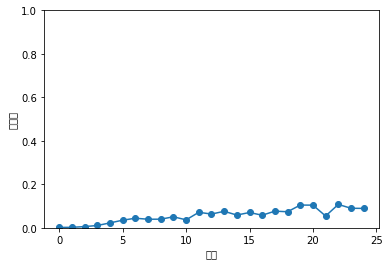

In [82]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

# show_addition_dataset.py

In [29]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189


(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


# ch6_Rnnlm_BetterRnnlm

In [5]:
# coding: utf-8
import sys
sys.path.append('..')
#from common.time_layers import *
#from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()

# coding: utf-8
import sys
sys.path.append('..')
#from common.time_layers import *
#from common.np import *  # import numpy as np
#from common.base_model import BaseModel


class BetterRnnlm(BaseModel):
    '''
     LSTM 계층을 2개 사용하고 각 층에 드롭아웃을 적용한 모델이다.
     아래 [1]에서 제안한 모델을 기초로 하였고, [2]와 [3]의 가중치 공유(weight tying)를 적용했다.

     [1] Recurrent Neural Network Regularization (https://arxiv.org/abs/1409.2329)
     [2] Using the Output Embedding to Improve Language Models (https://arxiv.org/abs/1608.05859)
     [3] Tying Word Vectors and Word Classifiers (https://arxiv.org/pdf/1611.01462.pdf)
    '''
    def __init__(self, vocab_size=10000, wordvec_size=650,
                 hidden_size=650, dropout_ratio=0.5):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b1 = np.zeros(4 * H).astype('f')
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b2 = np.zeros(4 * H).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            TimeAffine(embed_W.T, affine_b)  # weight tying!!
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs, train_flg=False):
        for layer in self.drop_layers:
            layer.train_flg = train_flg

        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts, train_flg=True):
        score = self.predict(xs, train_flg)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        for layer in self.lstm_layers:
            layer.reset_state()

# common_all

In [4]:
#================================================================================#
#base_model.py
#================================================================================#


# coding: utf-8
import sys
sys.path.append('..')
import os
import pickle
#from common.np import *
#from common.util import to_gpu, to_cpu


class BaseModel:
    def __init__(self):
        self.params, self.grads = None, None

    def forward(self, *args):
        raise NotImplementedError

    def backward(self, *args):
        raise NotImplementedError

    def save_params(self, file_name=None):
        if file_name is None:
            file_name = self.__class__.__name__ + '.pkl'

        params = [p.astype(np.float16) for p in self.params]
        if GPU:
            params = [to_cpu(p) for p in params]

        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name=None):
        if file_name is None:
            file_name = self.__class__.__name__ + '.pkl'

        if '/' in file_name:
            file_name = file_name.replace('/', os.sep)

        if not os.path.exists(file_name):
            raise IOError('No file: ' + file_name)

        with open(file_name, 'rb') as f:
            params = pickle.load(f)

        params = [p.astype('f') for p in params]
        if GPU:
            params = [to_gpu(p) for p in params]

        for i, param in enumerate(self.params):
            param[...] = params[i]


#================================================================================#
#config.py
#================================================================================#
# coding: utf-8

GPU = False

#================================================================================#
#functions.py
#================================================================================#
# coding: utf-8
#from common.np import *


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


#================================================================================#
#layers.py
#================================================================================#

# coding: utf-8
#from common.np import *  # import numpy as np
#from common.config import GPU
#from common.functions import softmax, cross_entropy_error


class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#================================================================================#
#layers.py
#================================================================================#

class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoid의 출력
        self.t = None  # 정답 데이터

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx


class Dropout:
    '''
    http://arxiv.org/abs/1207.0580
    '''
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None


#================================================================================#
#np.py
#================================================================================#

# coding: utf-8
#from common.config import GPU


if GPU:
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)
    np.add.at = np.scatter_add

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else:
    import numpy as np


#================================================================================#
#optimizer.py
#================================================================================#
# coding: utf-8
import sys
sys.path.append('..')
#from common.np import *


class SGD:
    '''
    확률적 경사하강법(Stochastic Gradient Descent)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


class Momentum:
    '''
    모멘텀 SGG(Momentum SGD)
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]


class Nesterov:
    '''
    네스테로프 가속 경사(NAG; Nesterov's Accelerated Gradient) (http://arxiv.org/abs/1212.0901)
    '네스테로프 모멘텀 최적화'라고도 한다.
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]


class AdaGrad:
    '''
    AdaGrad
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class RMSprop:
    '''
    RMSprop
    '''
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

#================================================================================#
#time_layers.py
#================================================================================#
# coding: utf-8
#from common.np import *  # import numpy as np (or import cupy as np)
#from common.layers import *
#from common.functions import sigmoid


class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.dot(h_prev, Wh) + np.dot(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache

        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.dot(h_prev.T, dt)
        dh_prev = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev


class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class LSTM:
    def __init__(self, Wx, Wh, b):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(4개분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가장추 매개변수(4개분의 가중치가 담겨 있음)
        b: 편향（4개분의 편향이 담겨 있음）
        '''
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev


class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None


class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None


class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx


class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_labelㅇㅔ 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx


class TimeDropout:
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None
        self.train_flg = True

    def forward(self, xs):
        if self.train_flg:
            flg = np.random.rand(*xs.shape) > self.dropout_ratio
            scale = 1 / (1.0 - self.dropout_ratio)
            self.mask = flg.astype(np.float32) * scale

            return xs * self.mask
        else:
            return xs

    def backward(self, dout):
        return dout * self.mask


class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)
        o2 = self.backward_lstm.forward(xs[:, ::-1])
        o2 = o2[:, ::-1]

        out = np.concatenate((o1, o2), axis=2)
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)
        do2 = do2[:, ::-1]
        dxs2 = self.backward_lstm.backward(do2)
        dxs2 = dxs2[:, ::-1]
        dxs = dxs1 + dxs2
        return dxs

# ====================================================================== #
# 이 아래의 계층들은 책에서 설명하지 않았거나
# 처리 속도보다는 쉽게 이해할 수 있도록 구현했습니다.
#
# TimeSigmoidWithLoss: 시계열 데이터용 시그모이드 + 손실 계층
# GRU: GRU 계층
# TimeGRU: 시계열 데이터용 GRU 계층
# BiTimeLSTM: 양방향 LSTM 계층
# Simple_TimeSoftmaxWithLoss：간단한 TimeSoftmaxWithLoss 계층의 구현
# Simple_TimeAffine: 간단한 TimeAffine 계층의 구현
# ====================================================================== #


class TimeSigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.xs_shape = None
        self.layers = None

    def forward(self, xs, ts):
        N, T = xs.shape
        self.xs_shape = xs.shape

        self.layers = []
        loss = 0

        for t in range(T):
            layer = SigmoidWithLoss()
            loss += layer.forward(xs[:, t], ts[:, t])
            self.layers.append(layer)

        return loss / T

    def backward(self, dout=1):
        N, T = self.xs_shape
        dxs = np.empty(self.xs_shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t] = layer.backward(dout)

        return dxs


class GRU:
    def __init__(self, Wx, Wh):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        '''
        self.Wx, self.Wh = Wx, Wh
        self.dWx, self.dWh = None, None
        self.cache = None

    def forward(self, x, h_prev):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]

        z = sigmoid(np.dot(x, Wxz) + np.dot(h_prev, Whz))
        r = sigmoid(np.dot(x, Wxr) + np.dot(h_prev, Whr))
        h_hat = np.tanh(np.dot(x, Wx) + np.dot(r*h_prev, Wh))
        h_next = (1-z) * h_prev + z * h_hat

        self.cache = (x, h_prev, z, r, h_hat)

        return h_next

    def backward(self, dh_next):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]
        x, h_prev, z, r, h_hat = self.cache

        dh_hat =dh_next * z
        dh_prev = dh_next * (1-z)

        # tanh
        dt = dh_hat * (1 - h_hat ** 2)
        dWh = np.dot((r * h_prev).T, dt)
        dhr = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)
        dh_prev += r * dhr

        # update gate(z)
        dz = dh_next * h_hat - dh_next * h_prev
        dt = dz * z * (1-z)
        dWhz = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whz.T)
        dWxz = np.dot(x.T, dt)
        dx += np.dot(dt, Wxz.T)

        # rest gate(r)
        dr = dhr * h_prev
        dt = dr * r * (1-r)
        dWhr = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whr.T)
        dWxr = np.dot(x.T, dt)
        dx += np.dot(dt, Wxr.T)

        self.dWx = np.hstack((dWxz, dWxr, dWx))
        self.dWh = np.hstack((dWhz, dWhr, dWh))

        return dx, dh_prev


class TimeGRU:
    def __init__(self, Wx, Wh, stateful=False):
        self.Wx, self.Wh = Wx, Wh
        selfdWx, self.dWh = None, None
        self.layers = None
        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        N, T, D = xs.shape
        H, H3 = self.Wh.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = GRU(self.Wx, self.Wh)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        N, T, H = dhs.shape
        D = self.Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        self.dWx, self.dWh = 0, 0

        dh = 0
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)

            dxs[:, t, :] = dx
            self.dWx += layer.dWx
            self.dWh += layer.dWh

        self.dh = dh
        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


class Simple_TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None

    def forward(self, xs, ts):
        N, T, V = xs.shape
        layers = []
        loss = 0

        for t in range(T):
            layer = SoftmaxWithLoss()
            loss += layer.forward(xs[:, t, :], ts[:, t])
            layers.append(layer)
        loss /= T

        self.cache = (layers, xs)
        return loss

    def backward(self, dout=1):
        layers, xs = self.cache
        N, T, V = xs.shape
        dxs = np.empty(xs.shape, dtype='f')

        dout *= 1/T
        for t in range(T):
            layer = layers[t]
            dxs[:, t, :] = layer.backward(dout)

        return dxs


class Simple_TimeAffine:
    def __init__(self, W, b):
        self.W, self.b = W, b
        self.dW, self.db = None, None
        self.layers = None

    def forward(self, xs):
        N, T, D = xs.shape
        D, M = self.W.shape

        self.layers = []
        out = np.empty((N, T, M), dtype='f')
        for t in range(T):
            layer = Affine(self.W, self.b)
            out[:, t, :] = layer.forward(xs[:, t, :])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, M = dout.shape
        D, M = self.W.shape

        dxs = np.empty((N, T, D), dtype='f')
        self.dW, self.db = 0, 0
        for t in range(T):
            layer = self.layers[t]
            dxs[:, t, :] = layer.backward(dout[:, t, :])

            self.dW += layer.dW
            self.db += layer.db

        return dxs

#================================================================================#
#trainer.py
#================================================================================#
# coding: utf-8
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
#from common.np import *  # import numpy as np
#from common.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()


class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads


#================================================================================#
#util.py
#================================================================================#

# coding: utf-8
import sys
sys.path.append('..')
import os
#from common.np import *


def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word


def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)


def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def convert_one_hot(corpus, vocab_size):
    '''원핫 표현으로 변환

    :param corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix


def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성

    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M


def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return:
    '''
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)


def to_cpu(x):
    import numpy
    if type(x) == numpy.ndarray:
        return x
    return np.asnumpy(x)


def to_gpu(x):
    import cupy
    if type(x) == cupy.ndarray:
        return x
    return cupy.asarray(x)


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


def eval_perplexity(model, corpus, batch_size=10, time_size=35):
    print('퍼플렉서티 평가 중 ...')
    corpus_size = len(corpus)
    total_loss, loss_cnt = 0, 0
    max_iters = (corpus_size - 1) // (batch_size * time_size)
    jump = (corpus_size - 1) // batch_size

    for iters in range(max_iters):
        xs = np.zeros((batch_size, time_size), dtype=np.int32)
        ts = np.zeros((batch_size, time_size), dtype=np.int32)
        time_offset = iters * time_size
        offsets = [time_offset + (i * jump) for i in range(batch_size)]
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                xs[i, t] = corpus[(offset + t) % corpus_size]
                ts[i, t] = corpus[(offset + t + 1) % corpus_size]

        try:
            loss = model.forward(xs, ts, train_flg=False)
        except TypeError:
            loss = model.forward(xs, ts)
        total_loss += loss

        sys.stdout.write('\r%d / %d' % (iters, max_iters))
        sys.stdout.flush()

    print('')
    ppl = np.exp(total_loss / max_iters)
    return ppl


def eval_seq2seq(model, question, correct, id_to_char,
                 verbos=False, is_reverse=False):
    correct = correct.flatten()
    # 머릿글자
    start_id = correct[0]
    correct = correct[1:]
    guess = model.generate(question, start_id, len(correct))

    # 문자열로 변환
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])

    if verbos:
        if is_reverse:
            question = question[::-1]

        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print('Q', question)
        print('T', correct)

        is_windows = os.name == 'nt'

        if correct == guess:
            mark = colors['ok'] + '☑' + colors['close']
            if is_windows:
                mark = 'O'
            print(mark + ' ' + guess)
        else:
            mark = colors['fail'] + '☒' + colors['close']
            if is_windows:
                mark = 'X'
            print(mark + ' ' + guess)
        print('---')

    return 1 if guess == correct else 0


def analogy(a, b, c, word_to_id, id_to_word, word_matrix, top=5, answer=None):
    for word in (a, b, c):
        if word not in word_to_id:
            print('%s(을)를 찾을 수 없습니다.' % word)
            return

    print('\n[analogy] ' + a + ':' + b + ' = ' + c + ':?')
    a_vec, b_vec, c_vec = word_matrix[word_to_id[a]], word_matrix[word_to_id[b]], word_matrix[word_to_id[c]]
    query_vec = b_vec - a_vec + c_vec
    query_vec = normalize(query_vec)

    similarity = np.dot(word_matrix, query_vec)

    if answer is not None:
        print("==>" + answer + ":" + str(np.dot(word_matrix[word_to_id[answer]], query_vec)))

    count = 0
    for i in (-1 * similarity).argsort():
        if np.isnan(similarity[i]):
            continue
        if id_to_word[i] in (a, b, c):
            continue
        print(' {0}: {1}'.format(id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def normalize(x):
    if x.ndim == 2:
        s = np.sqrt((x * x).sum(1))
        x /= s.reshape((s.shape[0], 1))
    elif x.ndim == 1:
        s = np.sqrt((x * x).sum())
        x /= s
    return x

